# 1) Introduction to Categorical Data

## Course introduction

**Categorical vs. numerical**

You are about to take your first look at a new dataset. Before you can properly explore specific columns, you need to be able to correctly identify columns as being either categorical, or numerical. This is an important step because the analyses you will run on each column are determined by the column's classification.

***Answer:***

<img src="/home/cyberx/data_camp_courses/images/Screenshot 2024-12-03 110120.png">

**Exploring a target variable**

You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, Above/Below 50k, you decide to explore the variable in more detail.

In [2]:
import pandas as pd

adult = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/adult.csv")

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Explore the Above/Below 50k variable
print(adult["Above/Below 50k"].describe())

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object


In [4]:
# Print a frequency table of "Above/Below 50k"
print(adult["Above/Below 50k"].value_counts())

 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64


In [5]:
# Print relative frequency values
print(adult["Above/Below 50k"].value_counts(normalize=True))

 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


**Ordinal categorical variables**

Columns regarding a person's income do not have to be numerical. If the income amount is split into distinct categories, the new column will be categorical. Since these categories will have a natural order (smallest income to largest), the variable is considered ordinal.

***Answer:***

<img src="/home/cyberx/data_camp_courses/images/Screenshot 2024-12-03 111257.png">


NOTE: Meskipun opsi berisi angka, opsi tersebut berupa rentang - yang menunjukkan variabel kategoris. Perhatikan bahwa kategori dapat ditempatkan dalam urutan logis, yang menjadikannya variabel ordinal.

## Categorical data in pandas

**Setting dtypes and saving memory**

A colleague of yours is exploring a list of occupations and how they relate to salary. She has given you a list of these occupations, list_of_occupations, and has a few simple questions such as "How many different titles are there?" and "Which position is the most common?".

In [1]:
import pandas as pd

adult = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/adult.csv")

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
list_of_occupations = adult['Marital Status']

list_of_occupations.head()

0          Never-married
1     Married-civ-spouse
2               Divorced
3     Married-civ-spouse
4     Married-civ-spouse
Name: Marital Status, dtype: object

In [3]:
# Create a Series, default dtype
series1 = pd.Series(list_of_occupations)

# Print out the data type and number of bytes for series1
print("series1 data type:", series1.dtype)
print("series1 number of bytes:", series1.nbytes)

series1 data type: object
series1 number of bytes: 260488


In [4]:
# Create a Series, "category" dtype
series2 = pd.Series(list_of_occupations, dtype="category")

# Print out the data type and number of bytes for series2
print("series2 data type:", series2.dtype)
print("series2 number of bytes:", series2.nbytes)

series2 data type: category
series2 number of bytes: 32617


**Creating a categorical pandas Series**

Another colleague at work has collected information on the number of "Gold", "Silver", and "Bronze" medals won by the USA at the Summer & Winter Olympics since 1896. She has provided this as a list, medals_won. Before taking a look at the total number of each medal won, you want to create a categorical pandas Series. However, you know that these medals have a specific order to them and that Gold is better than Silver, but Silver is better than Bronze. Use the object, medals_won, to help.

In [6]:
series2.dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

In [11]:
# Create a categorical Series and specify the categories (let pandas know the order matters!)
status_married = pd.Categorical(list_of_occupations, categories=[' Divorced', ' Married-AF-spouse', 
                                                                 ' Married-civ-spouse',' Married-spouse-absent', 
                                                                 ' Never-married', ' Separated',' Widowed'], ordered=True)
print(status_married)

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-civ-spouse', ' Married-civ-spouse', ..., ' Married-civ-spouse', ' Married-civ-spouse', ' Widowed', ' Never-married', ' Married-civ-spouse']
Length: 32561
Categories (7, object): [' Divorced' < ' Married-AF-spouse' < ' Married-civ-spouse' < ' Married-spouse-absent' < ' Never-married' < ' Separated' < ' Widowed']


**Setting dtype when reading data**

You are preparing to create a machine learning model to predict a person's income category using the adult census income dataset. You don't have access to any cloud resources and you want to make sure that your laptop will be able to load the full dataset and process its contents. You have read in the first five rows of the dataset adult to help you understand what kind of columns are available.

In [14]:
import pandas as pd

adult = pd.read_csv('/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/adult.csv')

In [13]:
# Check the dtypes
print(adult.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object


In [15]:
# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {
   "Workclass": "category",
   "Education": "category",
   "Relationship": "category",
   "Above/Below 50k": "category" 
}

In [17]:
# Read in the CSV using the dtypes parameter
adult2 = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/adult.csv", dtype=adult_dtypes)

print(adult2.dtypes)

Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


## Grouping data by category in pandas

**Create lots of groups**

You want to find the mean Age of adults when grouping by the following categories:

- "Workclass" (which has 9 categories)
- "Above/Below 50k" (which has 2 categories)
- "Education" (which has 16 categories).

You have developed the following bit of code:
```
gb = adult.groupby(by=[ "Workclass",
                        "Above/Below 50k", 
                        "Education"])
```
How many groups are in the gb object and what is the maximum possible number of groups that could have been created? The dataset adult, and the gb object have been preloaded for you.

In [18]:
import pandas as pd

adult = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/adult.csv")

In [19]:
gb = adult.groupby(by=[ "Workclass",
                        "Above/Below 50k", 
                        "Education"])

In [20]:
print(gb.size())

''' 
Only combinations of the three variables that exist are created when using groupby(). 
In this example, 208 groups are created out of 288 (2 * 9 * 16) possible groups.
'''

Workclass     Above/Below 50k  Education    
 ?             <=50K            10th             98
                                11th            118
                                12th             38
                                1st-4th          12
                                5th-6th          28
                                               ... 
 State-gov     >50K             Some-college     31
 Without-pay   <=50K            7th-8th           1
                                Assoc-acdm        1
                                HS-grad           9
                                Some-college      3
Length: 208, dtype: int64


' \nOnly combinations of the three variables that exist are created when using groupby(). \nIn this example, 208 groups are created out of 288 (2 * 9 * 16) possible groups.\n'

**Setting up a .groupby() statement**

The gender wage gap is a hot-topic item in the United States and across the world. Using the adult census income dataset, loaded as adult, you want to check if some of the recently published data lines up with this income survey.

In [24]:
import pandas as pd

adult = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/adult.csv")

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(by=["Sex",
                       "Above/Below 50k"])

# Print out how many rows are in each created group
print(gb.size())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64


In [27]:
# Print out the mean of each group for all columns
print(gb.mean())

                               Age         fnlgwt  Education Num  \
Sex     Above/Below 50k                                            
 Female  <=50K           36.210801  185999.381359       9.820475   
         >50K            42.125530  183687.406277      11.787108   
 Male    <=50K           37.147012  193093.609268       9.452142   
         >50K            44.625788  188769.101321      11.580606   

                         Capital Gain  Capital Loss  Hours/Week  
Sex     Above/Below 50k                                          
 Female  <=50K             121.986134     47.364470   35.916701  
         >50K             4200.389313    173.648855   40.426633  
 Male    <=50K             165.723823     56.806782   40.693879  
         >50K             3971.765836    198.780396   46.366106  


In [ ]:
''' 
Memang terlihat bahwa proporsi wanita yang berpenghasilan lebih dari 50 ribu dolar AS 
jauh lebih rendah dari pada pria. 
Namun, wanita yang berpenghasilan lebih dari 50 ribu dolar AS 
rata-rata lebih muda daripada rekan pria mereka.
'''

**Using pandas functions effectively**

You are creating a Python application that will calculate summary statistics based on user-selected variables. The complete dataset is quite large. For now, you are setting up your code using part of the dataset, preloaded as adult. As you create a reusable process, make sure you are thinking through the most efficient way to setup the GroupBy object.

In [28]:
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb["Hours/Week"].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

In [ ]:
''' 
Orang yang berpenghasilan lebih dari $50.000 cenderung bekerja lebih lama, 
terlepas dari pendidikan mereka, daripada orang yang berpenghasilan kurang dari $50.000. 

Ingat, penting untuk memilih variabel sebelum memanggil fungsi. 
Kumpulan data yang besar mungkin mengalami masalah dalam menghitung rata-rata setiap kolom numerik.
'''

# 2) Categorical pandas Series

## Setting category variables

**Setting categories**

After exploring the pandas Series "size" from the adoptable dogs dataset, you have decided that it should be an ordinal categorical variable. Creating such a variable takes a few steps. If these steps are performed out of order, you may not be able to access or use the necessary methods. The goal is to convert the "size" column from the dogs dataset into a ordered categorical pandas Series with the following categories: ["small", "medium", "large"].


***Answer:***

<img src="/home/cyberx/data_camp_courses/images/Screenshot 2024-12-05 072306.png">

**Adding categories**

The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". You are setting up a pipeline to do some analysis and want to look into what information is available regarding the "keep_in" variable. Both pandas, as pd, and the dogs dataset have been preloaded.

In [1]:
import pandas as pd

dogs = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/ShelterDogs.csv")

dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64


In [3]:
# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64


**Removing categories**

Before adopting dogs, parents might want to know whether or not a new dog likes children. When looking at the adoptable dogs dataset, dogs, you notice that the frequency of responses for the categorical Series "likes_children" looks like this:
```
maybe     1718
yes       1172
no          47
```
The owner of the data wants to convert all "maybe" responses to "no", as it would be unsafe to let a family adapt a dog if it doesn't like children. The code to convert all "maybe" to "no" is provided in Step 1. However, the option for "maybe" still remains as a category.

In [2]:
import numpy as np

dogs["likes_children"] = dogs["likes_children"].replace(np.nan, 'maybe', regex = True)

dogs["likes_children"].head()

0    maybe
1      yes
2    maybe
3    maybe
4    maybe
Name: likes_children, dtype: object

In [3]:
# Print the frequency table
print(dogs["likes_children"].value_counts(dropna=False))

maybe    1718
yes      1172
no         47
Name: likes_children, dtype: int64


In [4]:
# Change to category
dogs["likes_children"] = dogs["likes_children"].astype("category")

# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories)

Index(['maybe', 'no', 'yes'], dtype='object')


In [5]:
# Print the frequency table
print(dogs["likes_children"].value_counts())

no       1765
yes      1172
maybe       0
Name: likes_children, dtype: int64


In [6]:
# Remove the `"maybe" category
dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
print(dogs["likes_children"].value_counts())

no     1765
yes    1172
Name: likes_children, dtype: int64


In [7]:
# Print the categories one more time
print(dogs["likes_children"].cat.categories)

Index(['no', 'yes'], dtype='object')


## Updating categories

**Collapsing categories knowledge check**

You are working with a categorical column that has ten different responses. You want to collapse this into a new categorical column that only has three categories, instead of ten. What is the easiest method to use for this update?

***Answer:***

```Use pd.Series().replace() and then convert the column back to categorical using .astype('category').```

In [ ]:
""" 
Jika Anda perlu meruntuhkan kategori, metode .replace() cepat dan mudah, 
tetapi Anda perlu mengubah kolom kembali menjadi kategoris.
"""

**Renaming categories**

The likes_children column of the adoptable dogs dataset needs an update. Here are the current frequency counts:
```
Maybe?    1718
yes       1172
no          47
```
Two things that stick out are the differences in capitalization and the ? found in the Maybe? category. The data should be cleaner than this and you are being asked to make a few changes.

In [1]:
import pandas as pd

dogs = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/ShelterDogs.csv")

dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import numpy as np

# replace NaN to Maybe?
dogs["likes_children"] = dogs["likes_children"].replace(np.nan, 'Maybe?', regex = True)

print(dogs["likes_children"].head())

0    Maybe?
1       yes
2    Maybe?
3    Maybe?
4    Maybe?
Name: likes_children, dtype: object


In [3]:
# Change to category
dogs["likes_children"] = dogs["likes_children"].astype("category")

# Create the my_changes dictionary
my_changes = {"Maybe?": "Maybe"}

# Rename the categories listed in the my_changes dictionary
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(my_changes)

# Use a lambda function to convert all categories to uppercase using upper()
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs["likes_children"].cat.categories)

Index(['MAYBE', 'NO', 'YES'], dtype='object')


**Collapsing categories**

One problem that users of a local dog adoption website have voiced is that there are too many options. As they look through the different types of dogs, they are getting lost in the overwhelming amount of choice. To simplify some of the data, you are going through each column and collapsing data if appropriate. To preserve the original data, you are going to make new updated columns in the dogs dataset. You will start with the coat column. The frequency table is listed here:
```
short          1969
medium          565
wirehaired      220
long            180
medium-long       3
```

In [1]:
import pandas as pd

dogs = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/ShelterDogs.csv")

print(dogs.head())

      ID            name   age     sex               breed date_found  \
0  23807            Gida  0.25  female         Unknown Mix   12/10/19   
1    533  Frida És Ricsi  0.17  female         Unknown Mix    12/1/19   
2  23793             NaN  4.00    male         Unknown Mix    12/8/19   
3  23795             NaN  1.00    male         Unknown Mix    12/8/19   
4  23806             Amy  2.00  female  French Bulldog Mix   12/10/19   

  adoptable_from    posted            color    coat    size neutered  \
0       12/11/19  12/11/19              red   short   small       no   
1        12/1/19   12/9/19  black and white   short   small       no   
2       12/23/19   12/8/19      saddle back   short  medium       no   
3       12/23/19   12/8/19     yellow-brown  medium  medium       no   
4       12/11/19  12/11/19            black   short   small       no   

  housebroken likes_people likes_children get_along_males get_along_females  \
0         NaN          NaN            NaN        

In [3]:
# Print the frequency table
print(dogs["coat"].value_counts())

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64


In [5]:
# Create the update_coats dictionary
update_coats = {"wirehaired": "medium",
                "medium-long": "medium"}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


## Reordering categories

**Reordering categories in a Series**

The owner of a local dog adoption agency has asked you take a look at her data on adoptable dogs. She is specifically interested in the size of the dogs in her dataset and wants to know if there are differences in other variables, given a dog's size. The adoptable dogs dataset has been loaded as dogs and the "size" variable has already been saved as a categorical column.

In [11]:
import pandas as pd

path = "/home/cyberx/data_camp_courses/datasets/"
dogs = pd.read_csv(path + "working_with_categorical_data/ShelterDogs.csv")

dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Change to Category
dogs["size"] = dogs["size"].astype("category")

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

Index(['large', 'medium', 'small'], dtype='object')


In [16]:
# Reorder the categories using the list provided
dogs["size"] = dogs["size"].cat.reorder_categories(
    new_categories=["small", "large", "medium"], 
    ordered=False
)

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

Index(['small', 'large', 'medium'], dtype='object')


In [17]:
# Reorder the categories, specifying the Series is ordinal
dogs["size"] = dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True
)

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

Index(['small', 'medium', 'large'], dtype='object')


In [19]:
# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

Index(['small', 'medium', 'large'], dtype='object')


/tmp/ipykernel_32807/4083169103.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  dogs["size"].cat.reorder_categories(


**Using .groupby() after reordering**

It is now time to run some analyses on the adoptable dogs dataset that is focused on the "size" of the dog. You have already developed some code to reorder the categories. In this exercise, you will develop two similar .groupby() statements to help better understand the effect of "size" on other variables. dogs has been preloaded for you.

In [20]:
# Previous code
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

# How many Male/Female dogs are available of each size?
print(dogs.groupby("size")["sex"].value_counts())

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64


/tmp/ipykernel_32807/51238195.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  dogs["size"].cat.reorder_categories(


In [21]:
# Do larger dogs need more room to roam?
print(dogs.groupby("size")["keep_in"].value_counts())

size    keep_in             
small   both flat and garden    238
        flat                     80
        garden                   21
medium  both flat and garden    795
        garden                  317
        flat                     97
large   both flat and garden    191
        garden                  172
        flat                      5
Name: keep_in, dtype: int64


In [ ]:
""" 
Jumlah anjing jantan berukuran sedang lebih banyak dari pada kombinasi ukuran dan jenis kelamin lainnya. 
Anjing yang lebih besar juga lebih sering dipelihara di luar, dibandingkan di kandang.
"""

## Cleaning and accessing data

**Cleaning variables**

Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, dogs. Here is the current frequency table of the "sex" column:
```
male      1672
female    1249
 MALE        10
 FEMALE       5
Malez        1
```
Now that the system only takes responses of "female" and "male", you want this variable to match the updated system.

In [23]:
import pandas as pd

dogs = pd.read_csv("/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/ShelterDogs.csv")

In [25]:
# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype("category")

print(dogs["sex"].value_counts())

male      1681
female    1256
Name: sex, dtype: int64


**Accessing and filtering data**

You are working on a Python application to display information about the dogs available for adoption at your local animal shelter. Some of the variables of interest, such as "breed", "size", and "coat", are saved as categorical variables. In order for this application to work properly, you need to be able to access and filter data using these columns.

The ID variable has been set as the index of the pandas DataFrame dogs.

In [1]:
import pandas as pd

path = "/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/"
   
# read the CSV file and set the first row as index
dogs = pd.read_csv(path + 'ShelterDogs.csv', header=0, index_col=0)

In [ ]:
print(dogs[dogs["breed"].str.contains("....")]["breed"].value_counts())

In [4]:
name_changes = {"Unknown Mix": "Unknown",
                "Akita Mix": "Akita",
                "Akita, Boxer Mix": "Akita",
                "Akita, German Shepherd Dog Mix": "Akita",
                "Akita, Labrador Retriever Mix": "Akita",
                "American Bulldog Mix": "American Bulldog",
                "American Bulldog, Dogo Argentino Mix": "American Bulldog",
                "American Pit Bull Terrier, Staffordshire Terrier Mix": "American Pit Bull Terrier",
                "Australian Shepherd, Labrador Retriever Mix": "Australian Shepherd",
                "Australian Cattle Dog, German Shepherd Dog Mix": "Australian Cattle Dog",
                "Alaskan Malamute, Caucasian Ovtcharka, German Shepherd Dog Mix": "Alaskan Malamute",
                "Azawakh, Hungarian Greyhound Mix": "Azawakh",
                "Beagle Mix": "Beagle",
                "Beagle, Hound Mix": "Beagle",
                "Beagle, Dachshund Mix": "Beagle",
                "Beagle, Labrador Retriever, Scotch Collie Mix": "Beagle",
                "Beagle, Chihuahua Mix": "Beagle",
                "Bearded Collie Mix": "Bearded Collie",
                "Bearded Collie, Labrador Retriever Mix": "Bearded Collie",
                "Bearded Collie, Staffordshire Terrier Mix": "Bearded Collie",
                "Belgian Malinois Mix": "Belgian Malinois",
                "Belgian Malinois, German Shepherd Dog Mix": "Belgian Malinois",
                "Belgian Malinois, Labrador Retriever Mix": "Belgian Malinois",
                "Belgian Malinois, Greyhound Mix": "Belgian Malinois",
                "Belgian Malinois, Belgian Sheepdog Mix": "Belgian Malinois",
                "Belgian Malinois, Hungarian Vizsla Mix": "Belgian Malinois",
                "Belgian Sheepdog Mix": "Belgian Sheepdog",
                "Belgian Sheepdog, German Shepherd Dog Mix": "Belgian Sheepdog",
                "Belgian Sheepdog, Mudi Mix": "Belgian Sheepdog",
                "Bull Terrier Mix": "Bull Terrier",
                "Bull Terrier, Dachshund Mix": "Bull Terrier",
                "Bull Terrier, Staffordshire Terrier Mix": "Bull Terrier",
                "Bull Terrier, Fox Terrier, Staffordshire Terrier Mix": "Bull Terrier",
                "Bull Terrier, Hungarian Greyhound Mix": "Bull Terrier",
                "Bullmastiff Mix": "Bullmastiff",
                "Bulldog Mix": "Bulldog",
                "Chinese Shar-Pei Mix": "Chinese Shar-Pei",
                "Chinese Shar-Pei, Dachshund Mix": "Chinese Shar-Pei",
                "Chinese Shar-Pei, Dachshund, Fox Terrier Mix": "Chinese Shar-Pei",
                "Chinese Shar-Pei, Staffordshire Terrier Mix": "Chinese Shar-Pei",
                "Chinese Shar-Pei, Vizsla Mix": "Chinese Shar-Pei",
                "Chinese Shar-Pei, Labrador Retriever Mix": "Chinese Shar-Pei",
                "Cane Corso Mix": "Cane Corso",
                "Chihuahua Mix": "Chihuahua",
                "Chihuahua, Pinscher Mix": "Chihuahua",
                "Chihuahua, Dachshund, Pinscher Mix": "Chihuahua",
                "Caucasian Ovtcharka, German Shepherd Dog Mix": "Caucasian Ovtcharka",
                "Caucasian Ovtcharka Mix": "Caucasian Ovtcharka",
                "Caucasian Ovtcharka, Siberian Husky Mix": "Caucasian Ovtcharka",
                "Caucasian Ovtcharka, Rottweiler Mix": "Caucasian Ovtcharka",
                "Canary Dog Mix": "Canary Dog",
                "Central Asian Ovtcharka Mix": "Central Asian Ovtcharka",
                "Chow Chow Mix": "Chow Chow",
                "Chow Chow, Dachshund Mix": "Chow Chow",
                "Collie Mix": "Collie",
                "Dachshund Mix": "Dachshund",
                "Dachshund, Fox Terrier Mix": "Dachshund",
                "Dachshund, German Shepherd Dog Mix": "Dachshund",
                "Dachshund, Spaniel Mix": "Dachshund",
                "Dachshund, English Cocker Spaniel Mix": "Dachshund",
                "Dachshund, Labrador Retriever Mix": "Dachshund",
                "Dachshund, Jack Russell Terrier Mix": "Dachshund",
                "Dachshund, German Shepherd Dog, Labrador Retriever Mix": "Dachshund",
                "Dachshund, English Cocker Spaniel, Whippet Mix": "Dachshund",
                "Dachshund, Terrier Mix": "Dachshund",
                "Dachshund, Pekingese Mix": "Dachshund",
                "Dachshund, Vizsla Mix": "Dachshund",
                "Dachshund, Golden Retriever Mix": "Dachshund",
                "Dachshund, Havanese, Setter Mix": "Dachshund",
                "Dachshund, Hound Mix": "Dachshund",
                "Dachshund, Staffordshire Terrier Mix": "Dachshund",
                "Dachshund, Mudi, Papillon Mix": "Dachshund", 
                "Dachshund, Setter Mix": "Dachshund",
                "Dogo Argentino Mix": "Dogo Argentino",
                "Dogo Argentino, Staffordshire Terrier Mix": "Dogo Argentino",
                "Doberman Mix": "Doberman",
                "Doberman, Greyhound, Labrador Retriever Mix": "Doberman",
                "English Greyhound, Spanish Greyhound Mix": "English Greyhound",
                "English Greyhound Mix": "English Greyhound",
                "English Cocker Spaniel Mix": "English Cocker",
                "English Cocker Spaniel, Labrador Retriever Mix": "English Cocker",
                "English Cocker Spaniel, Terrier Mix": "English Cocker",
                "English Cocker Spaniel, Vizsla Mix": "English Cocker",
                "English Cocker Spaniel, Spitz Mix": "English Cocker",
                "English Bloodhound, German Shepherd Dog Mix": "English Bloodhound",
                "French Bulldog Mix": "French Bulldog",
                "Fox Terrier Mix": "Fox Terrier",
                "Fox Terrier, Staffordshire Terrier Mix": "Fox Terrier",
                "Fox Terrier, Whippet Mix": "Fox Terrier",
                "Fox Terrier, Spaniel Mix": "Fox Terrier",
                "Fox Terrier, Schnauzer Mix": "Fox Terrier",
                "Fox Terrier, Pekingese Mix": "Fox Terrier",
                "Fox Terrier, Jagd Terrier Mix": "Fox Terrier",
                "Fox Terrier, German Shepherd Dog Mix": "Fox Terrier",
                "German Shepherd Dog Mix": "German Shepherd Dog",
                "German Shepherd Dog, Staffordshire Terrier Mix": "German Shepherd Dog",
                "German Shepherd Dog, Hound Mix": "German Shepherd Dog",
                "German Shepherd Dog, Greyhound Mix": "German Shepherd Dog",
                "German Shepherd Dog, Siberian Husky Mix": "German Shepherd Dog",
                "German Shepherd Dog, Transylvanian Hound Mix": "German Shepherd Dog",
                "German Shepherd Dog, Labrador Retriever Mix": "German Shepherd Dog",
                "German Shepherd Dog, Schnauzer Mix": "German Shepherd Dog",
                "German Shepherd Dog, Labrador Retriever, Staffordshire Terrier Mix": "German Shepherd Dog",
                "German Shepherd Dog, Rottweiler, Staffordshire Terrier Mix": "German Shepherd Dog",
                "German Shepherd Dog, Pumi Mix": "German Shepherd Dog",
                "German Shepherd Dog, Scotch Collie Mix": "German Shepherd Dog",
                "German Shepherd Dog, Mudi Mix": "German Shepherd Dog",
                "German Shepherd Dog, Pinscher, Siberian Husky Mix": "German Shepherd Dog",
                "German Shepherd Dog, Rottweiler Mix": "German Shepherd Dog",
                "Greyhound Mix": "Greyhound",
                "Greyhound, Labrador Retriever Mix": "Greyhound",
                "Greyhound, Vizsla, Weimaraner Mix": "Greyhound",
                "Greyhound, Hungarian Greyhound Mix": "Greyhound",
                "Greyhound, Transylvanian Hound Mix": "Greyhound",
                "Great Dane Mix": "Great Dane",
                "Great Dane, Staffordshire Terrier Mix": "Great Dane",
                "Great Pyrenees Mix": "Great Pyrenees",
                "Golden Retriever, Labrador Retriever Mix": "Golden Retriever",
                "Golden Retriever Mix": "Golden Retriever",
                "Golden Retriever, Terrier Mix": "Golden Retriever",
                "Golden Retriever, Setter, Vizsla Mix": "Golden Retriever",
                "Golden Retriever, Kuvasz Mix": "Golden Retriever",
                "Hungarian Vizsla, Staffordshire Terrier Mix": "Hungarian Vizsla",
                "Hungarian Vizsla, Labrador Retriever Mix": "Hungarian Vizsla",
                "Hungarian Vizsla Mix": "Hungarian Vizsla",
                "Hungarian Greyhound Mix": "Hungarian Greyhound",
                "Havanese, Poodle Mix": "Havanese",
                "Havanese, Puli, Pumi Mix": "Havanese",
                "Hovawart Mix": "Hovawart",
                "Hound Mix": "Hound",
                "Hound, Staffordshire Terrier Mix": "Hound",
                "Hound, Labrador Retriever Mix": "Hound",
                "Irish Setter, Vizsla Mix": "Irish Setter",
                "Irish Wolfhound Mix": "Irish Wolfhound",
                "Jagd Terrier Mix": "Jagd Terrier",
                "Jagd Terrier, Puli Mix": "Jagd Terrier",
                "Jack Russell Terrier Mix": "Jack Russell Terrier",
                "Komondor Mix": "Komondor",
                "Komondor, Puli Mix": "Komondor",
                "Kuvasz Mix": "Kuvasz",
                "Kuvasz, Pumi Mix": "Kuvasz",
                "Kuvasz, Labrador Retriever Mix": "Kuvasz",
                "Labrador Retriever Mix": "Labrador Retriever",
                "Labrador Retriever, Poodle Mix": "Labrador Retriever",
                "Labrador Retriever, Staffordshire Terrier Mix": "Labrador Retriever",
                "Labrador Retriever, Vizsla Mix": "Labrador Retriever",
                "Labrador Retriever, Rhodesian Ridgeback Mix": "Labrador Retriever",
                "Labrador Retriever, Transylvanian Hound Mix": "Labrador Retriever",
                "Labrador Retriever, Newfoundland Mix": "Labrador Retriever",
                "Mudi Mix": "Mudi",
                "Mudi, Puli Mix": "Mudi",
                "Mastiff Mix": "Mastiff",
                "Miniature Schnauzer Mix": "Miniature Schnauzer",
                "Norfolk Terrier Mix": "Norfolk Terrier",
                "Newfoundland Mix": "Newfoundland",
                "Old German Shepherd Mix": "Old German Shepherd",
                "Puli Mix": "Puli",
                "Puli, Pumi Mix": "Puli",
                "Puli, Terrier Mix": "Puli",
                "Puli, Spaniel Mix": "Puli",
                "Puli, Schnauzer, Spaniel Mix": "Puli",
                "Puli, Schnauzer Mix": "Puli",
                "Puli, Pumi, Tibetan Terrier Mix": "Puli",
                "Puli, Scotch Collie Mix": "Puli",
                "Pinscher Mix": "Pinscher",
                "Poodle Mix": "Poodle",
                "Poodle, Pumi Mix": "Poodle",
                "Pekingese Mix": "Pekingese",
                "Pekingese, Tibetan Spaniel Mix": "Pekingese",
                "Pekingese, Spitz Mix": "Pekingese",
                "Pumi Mix": "Pumi",
                "Pumi, Schnauzer Mix": "Pumi",
                "Pointer Mix": "Pointer",
                "Pointer, Setter Mix": "Pointer",
                "Parson Russell Terrier Mix": "Parson Russell Terrier",
                "Rottweiler Mix": "Rottweiler",
                "Rottweiler, Transylvanian Hound Mix": "Rottweiler",
                "Rhodesian Ridgeback Mix": "Rhodesian Ridgeback",
                "Russian Laikas Mix": "Russian Laikas",
                "Staffordshire Terrier Mix": "Staffordshire Terrier",
                "Spaniel Mix": "Spaniel",
                "Spaniel, Terrier Mix": "Spaniel",
                "Siberian Husky Mix": "Siberian Husky",
                "Siberian Husky, Transylvanian Hound Mix": "Siberian Husky",
                "Schnauzer Mix": "Schnauzer",
                "Schnauzer, Terrier Mix": "Schnauzer",
                "Schnauzer, Spaniel Mix": "Schnauzer",
                "Setter Mix": "Setter",
                "Setter, Spaniel, Terrier Mix": "Setter",
                "Tibetan Terrier Mix": "Tibetan Terrier",
                "Vizsla Mix": "Vizsla",
                "Vizsla, Whippet Mix": "Vizsla",
}

dogs["breed"] = dogs["breed"].replace(name_changes)
dogs["breed"] = dogs["breed"].astype("category")

print(dogs["breed"].cat.categories)

Index(['Adoptable From:', 'Afghan Hound', 'Akita', 'Alaskan Malamute',
       'American Bulldog', 'American Pit Bull Terrier',
       'Australian Cattle Dog', 'Australian Shepherd', 'Azawakh',
       'Basset Hound Mix',
       ...
       'Terrier Mix', 'Tibetan Mastiff Mix', 'Tibetan Terrier',
       'Transylvanian Hound Mix', 'Unknown', 'Vizsla', 'Welsh Terrier Mix',
       'West Highland White Terrier Mix', 'Whippet Mix', 'Yorkshire Terrier'],
      dtype='object', length=120)


In [6]:
dogs["breed"].value_counts()

Unknown                             1524
German Shepherd Dog                  263
Dachshund                            186
Labrador Retriever                   111
Staffordshire Terrier                 75
                                    ... 
Canary Dog                             1
Bulldog                                1
Boxer, Staffordshire Terrier Mix       1
Boxer, Schnauzer Mix                   1
Yorkshire Terrier                      1
Name: breed, Length: 120, dtype: int64

In [7]:
# Print the category of the coat for ID 23807
print(dogs.loc[23807, "coat"])

short


In [8]:
# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs.coat == "long", "sex"].value_counts())

male      124
female     56
Name: sex, dtype: int64


In [9]:
# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs.breed == "English Cocker Spaniel", "age"].mean())

8.186153846153847


In [10]:
# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])

32


# 3) Visualizing Categorical Data

## Introduction to categorical plots using Seaborn

**Boxplot understanding**

The following boxplot shows hotel review scores given the traveler type. Select the response that best describes the box plots.

<img src="https://assets.datacamp.com/production/repositories/5809/datasets/036a214f31020cb07b5ce72fddccaec878725070/3.1_mc4.png" alt="Logo" width="350">

***Answer***

Three of the five traveler types have outliers as indicated by the black dots lying outside of the black bands of the box plot.

---

**Creating a box plot**

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variable.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "/home/cyberx/data_camp_courses/datasets/working_with_categorical_data/"

reviews = pd.read_csv(path + "lasvegas_tripadvisor.csv")

In [3]:
reviews.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


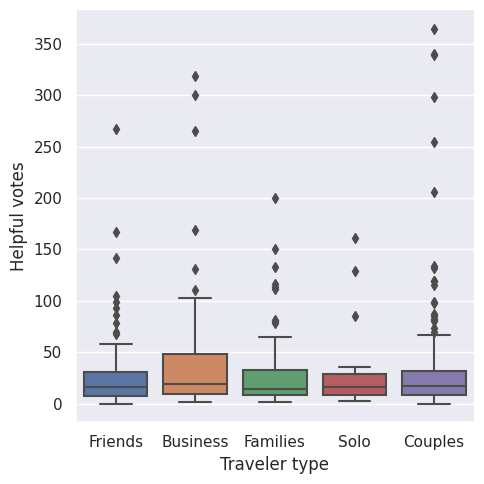

In [8]:
# Set the font size to 1.25
sns.set(font_scale = 1.00)

# Set the background to "darkgrid"
sns.set_style("darkgrid")


# Create a boxplot
sns.catplot(x="Traveler type",
            y="Helpful votes",
            data=reviews,
            kind="box")

plt.show()

# 4) Pitfalls and Encoding